# Part 3: Common spatial pattern on motor imagery dataset

Here we shall look at the motor imagery task.  Look at the dataset, this belongs to one participant performing motor imagery task where they were asked to (1) squeeze the ball using their left and right hand (executed condition) and (2) to imagine squeezing the ball using their left and right hand (imagined).

Runs 1 and 2 are fixations, Odd runs are 3, 5, 7, 9 are executed, while even runs are 4, 6, 8, 10 are imagined.

In this tutorial, we shall visit (1) event related desynchronization, (2) common spatial pattern, and (3) long-short term for decoding motor imagery - all of which are proven methods in the literature.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import mne
from mne import create_info
from mne.io import RawArray
from mne.time_frequency import psd_welch

import os

## 1. Loading the data

In [19]:
base_url = 'data/S020'
runs = ['04','06','08','10']
raws = []

for run in runs:
    filename = f'S020R{run}_raw'
    path_file = os.path.join(base_url, filename + '.fif')
    raw = mne.io.read_raw_fif(path_file , preload=True, verbose='Warning')
    raws.append(raw)

np.concatenate(raw, axis = 1)
df = raw.to_data_frame()
print(df.shape)
df.head()


(54711, 10)


,time,Fp1,Fp2,C3,C4,P7,P8,O1,O2,STIM MARKERS
0,0.000,9321.034886,12011.291459,12104.967609,8970.358409,12546.325102,16009.012237,16274.215654,10237.098671,0.0
1,0.004,9330.981411,12020.276859,12097.010389,8970.626630,12548.493221,16000.071540,16274.260357,10231.644846,0.0
2,0.008,9341.531433,12031.564489,12090.662494,8974.672295,12550.080195,15991.443768,16274.640337,10223.642923,0.0
3,0.012,9341.620840,12035.185471,12094.618753,8979.857899,12549.275532,15997.545794,16269.544140,10223.441757,0.0
4,0.016,9329.819120,12024.926022,12098.977342,8976.259269,12543.017045,16007.581726,16260.089353,10229.476728,0.0


In [20]:
df['STIM MARKERS'].unique()

array([0., 4., 1., 2.])

## 2. Artifact Removal

In [21]:
raw.notch_filter(50)

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 1651 samples (6.604 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished


<Raw | S020R10_raw.fif, 9 x 54711 (218.8 s), ~3.8 MB, data loaded>

In [22]:
#motor imagery falls in this range
raw.filter(7, 14)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 14 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 7.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 6.00 Hz)
- Upper passband edge: 14.00 Hz
- Upper transition bandwidth: 3.50 Hz (-6 dB cutoff frequency: 15.75 Hz)
- Filter length: 413 samples (1.652 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished


<Raw | S020R10_raw.fif, 9 x 54711 (218.8 s), ~3.8 MB, data loaded>

Effective window size : 1.024 (s)


/Users/chaklam/DSAI/Environments/teaching_env/lib/python3.8/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


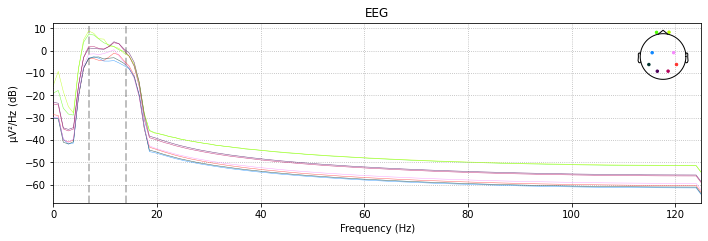

In [23]:
raw.compute_psd().plot()